# Movie Recommendation System
*Building a movie recommendation System using three way:*

 * 1) Popularity based recommendation system
 * 2) Content based recommendation system
 * 3) Collaborative filtering based recommendation system
 * 4) Hybrid recommendation system

# Importing libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from difflib import get_close_matches
import warnings
warnings.filterwarnings('ignore')

# Loading the raw data

In [2]:
# Importing dataset
raw_data = pd.read_csv(r"C:\Users\SOUMEN\Downloads\movie_dataset.csv")
# movie = raw_data[['id', 'original_title']]
raw_data.head(5)
# movie.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


# Exploratory Data Analysis & Preprocessing
Exploring the descriptive statistics of the variables

In [3]:
raw_data.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [4]:
# Total number of data points and columns
raw_data.shape

(4803, 24)

In [5]:
raw_data.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [6]:
# checking if any duplicates
raw_data[raw_data.duplicated()]

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director


In [7]:
# Selecting usefull features
df = raw_data[['id','genres','original_title','release_date','vote_average','vote_count','cast', 'director']]

In [8]:
# column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4803 non-null   int64  
 1   genres          4775 non-null   object 
 2   original_title  4803 non-null   object 
 3   release_date    4802 non-null   object 
 4   vote_average    4803 non-null   float64
 5   vote_count      4803 non-null   int64  
 6   cast            4760 non-null   object 
 7   director        4773 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 300.3+ KB


In [9]:
# converting string date time into pandas date time
df['release_date'] = pd.to_datetime(df['release_date'])

# creating year column and droping release date column
df['year'] =pd.DatetimeIndex(df['release_date']).year

# now delet release date column
df = df.drop('release_date',axis=1)

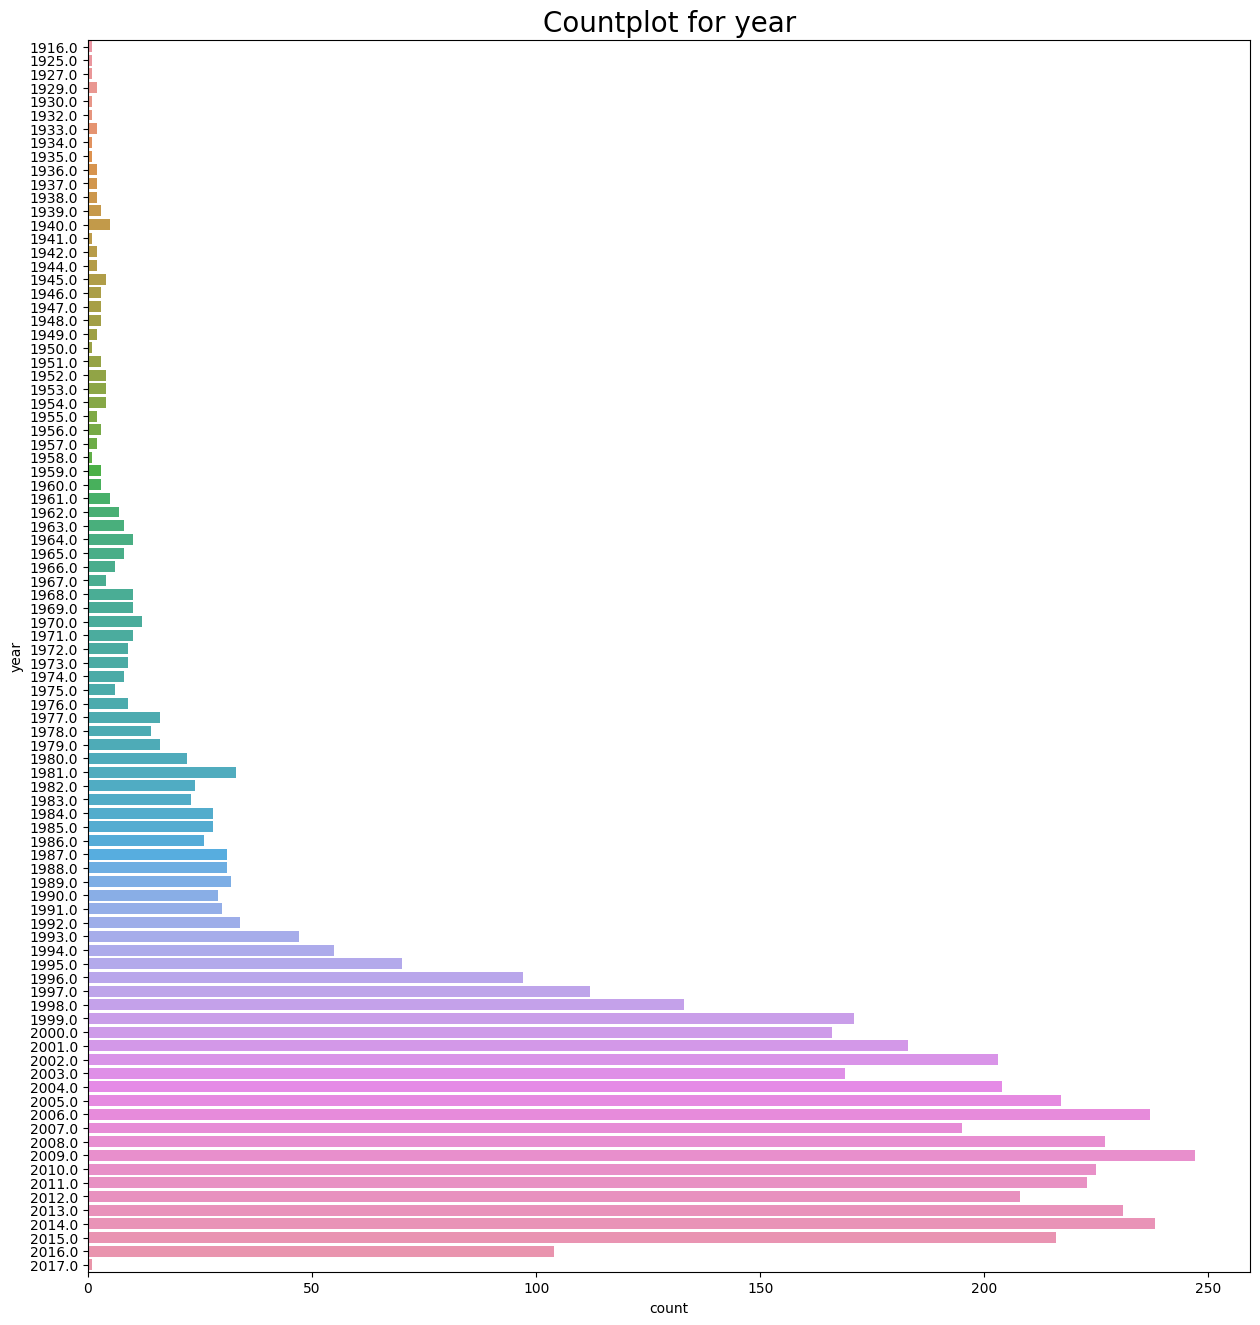

In [10]:
# so its clear that in our dataset we have movies only upto 2017, and most of the movies released in 2009
plt.figure(figsize=[15,16])
sns.countplot(data=df, y='year')
plt.title('Countplot for year', fontsize = 20)
plt.show()

* so its clear that in our dataset we have movies only upto 2017, and most of the movies released in 2009

In [11]:
# Now we are not using year column also
#df = df.drop("year", axis=1)
print(df.columns)

Index(['id', 'genres', 'original_title', 'vote_average', 'vote_count', 'cast',
       'director', 'year'],
      dtype='object')


In [12]:
# Cheking nan value
df.isna().sum()

id                 0
genres            28
original_title     0
vote_average       0
vote_count         0
cast              43
director          30
year               1
dtype: int64

In [13]:
# Filing nan value with blank string
df['genres'] = df['genres'].replace(np.nan," ")
df['cast'] = df['cast'].replace(np.nan," ")
df['director'] = df['director'].replace(np.nan," ")

# Collecting 2018, 2019, 2020 Movies Data from Wikipedia

* As we know in our dataset we have movies only upto 2017.

In [14]:
# Scraping 2018, 2019, 2020 movie data from wikipedia.
link1 = "https://en.wikipedia.org/wiki/List_of_American_films_of_2018"
link2 = "https://en.wikipedia.org/wiki/List_of_American_films_of_2019"
link3 = "https://en.wikipedia.org/wiki/List_of_American_films_of_2020"

df1 = pd.read_html(link1,header=0)[2]
df2 = pd.read_html(link1,header=0)[3]
df3 = pd.read_html(link1,header=0)[4]
df4 = pd.read_html(link1,header=0)[5]

df5 = pd.read_html(link2, header=0)[3]
df6 = pd.read_html(link2, header=0)[4]
df7 = pd.read_html(link2, header=0)[5]
df8 = pd.read_html(link2, header=0)[6]


df9 = pd.read_html(link3, header=0)[3]
df10 = pd.read_html(link3, header=0)[4]
df11 = pd.read_html(link3, header=0)[5]
df12 = pd.read_html(link3, header=0)[6]

# combine all scraped dataframe in one
frame = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12]
wiki_df = pd.concat(frame).reset_index(drop=True)

In [15]:
wiki_df.head(10)

,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.,".mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:""[ ""}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:"" ]""}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar a>span,.mw-parser-output .navbar a>abbr{text-decoration:inherit}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}vte2019 films",".mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:""[ ""}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:"" ]""}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar a>span,.mw-parser-output .navbar a>abbr{text-decoration:inherit}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}vte2019 films.1",".mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:""[ ""}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:"" ]""}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar a>span,.mw-parser-output .navbar a>abbr{text-decoration:inherit}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}vte2020 films",".mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:""[ ""}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:"" ]""}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar a>span,.mw-parser-output .navbar a>abbr{text-decoration:inherit}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}vte2020 films.1"
0,J A N U A R Y,5.0,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / S...,Adam Robitel (director); Leigh Whannell (scree...,[2],NaN,NaN,NaN,NaN,NaN
1,J A N U A R Y,5.0,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcl...,[3],NaN,NaN,NaN,NaN,NaN
2,J A N U A R Y,5.0,Stratton,Momentum Pictures / GFM Films,"Simon West (director); Duncan Falconer, Warren...",[4],NaN,NaN,NaN,NaN,NaN
3,J A N U A R Y,10.0,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, St...",

### *Extracting some more movie information like genres, vote count, vote average from TMDB API*

In wikipedia movies tables we didn't able to find movie information like movie genre, vote count, vote average. so i am using tmdb api to get this information.

In [16]:
# importing tmdb
from tmdbv3api import TMDb,Movie
import json
import requests

# Creating TMDB Api Object
tmdb = TMDb()
tmdb.api_key = 'a8f3c31b4bc4c4de56e1affe22e456ff'
tmdb_movie = Movie()

# This Function take movie title and return movie genre, vote_average, vote_count
def get_genre(title):
    try:
        result = tmdb_movie.search(title)
        movie_id = result[0].id
        response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
        data_json = response.json()

        # Fetching movie genre
        movie_genres = []
        genr_str = " "
        for i in range(0,len(data_json['genres'])):
            movie_genres.append(data_json['genres'][i]['name'])
        genre = genr_str.join(movie_genres)
        
        # Fetching vote average and vote count
        vote_average = data_json['vote_average']
        vote_count = data_json['vote_count']
    except:
        vote_average = np.nan
        vote_count = np.nan
        genre = np.nan
    return genre,vote_average,vote_count

In [17]:
# Now creating genre, vote average, vote count column.
wiki_df['Genre'] = wiki_df['Title'].apply(lambda x:get_genre(x)[0])
wiki_df['Vote_Average'] = wiki_df['Title'].apply(lambda x:get_genre(x)[1])
wiki_df['Vote_Count'] = wiki_df['Title'].apply(lambda x:get_genre(x)[2])

In [18]:
# Now Selecting only usefull feature.
wiki_df2= wiki_df[["Title","Cast and crew","Genre","Vote_Average","Vote_Count"]]
wiki_df2.head()

,Title,Cast and crew,Genre,Vote_Average,Vote_Count
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,Horror Mystery Thriller,6.280,2628.0
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcl...,Thriller Drama,5.346,68.0
2,Stratton,"Simon West (director); Duncan Falconer, Warren...",Action Thriller,4.979,192.0
3,Sweet Country,"Warwick Thornton (director); David Tranter, St...",Western Crime Thriller Drama,6.602,162.0
4,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,Action Thriller Mystery,6.348,4082.0


In [19]:
# Checking missing value
wiki_df2[wiki_df2.isna().any(axis=1)]

,Title,Cast and crew,Genre,Vote_Average,Vote_Count
435,Honey Boy,Alma Har'el (director); Shia LaBeouf (screenpl...,Drama,7.101,NaN
436,Lady and the Tramp,"Charlie Bean (director); Andrew Bujalski, Kari...",Family Animation Romance,7.104,NaN
437,Noelle,Marc Lawrence (director/screenplay); Anna Kend...,Family Comedy Fantasy,6.600,NaN
438,Ford v Ferrari,"James Mangold (director); Jez Butterworth, Joh...",Drama Action History,8.009,NaN
439,Charlie's Angels,Elizabeth Banks (director/screenplay); Kristen...,Action Adventure Comedy Crime Thriller,5.820,NaN
...,...,...,...,...,...
683,News of the World,Paul Greengrass (director/screenplay); Luke Da...,Drama Western Adventure,6.996,NaN
684,One Night in Miami...,Regina King (director); Kemp Powers (screenpla...,Drama,7.067,NaN
685,Promising Young Woman,Emerald Fennell (director/screenplay); Carey M...,Thriller Crime Drama,7.471,NaN
686,Pieces of a Woman,Kornél Mundruczó (director); Kata Wéber (scree...,Drama,7.044,NaN


In [20]:
wiki_df2 =  wiki_df2.fillna({'Genre':'', 'Vote_Average':0,'Vote_Count':0})

# Text Preprocessing.
So our data requires some preprocessing before we go on further.

In [21]:
# Cheking random row values of cast and crew column.
sent_1 = wiki_df2['Cast and crew'][1]
sent_2 = wiki_df2['Cast and crew'][55]
sent_3 = wiki_df2['Cast and crew'][42]
sent_4 = wiki_df2['Cast and crew'][88]
sent_5 = wiki_df2['Cast and crew'][500]
print(sent_1)
print("====================================")
print(sent_2)
print("====================================")
print(sent_3)
print("====================================")
print(sent_4)
print("====================================")
print(sent_5)

Lauren Wolkstein (director); Christopher Radcliff (co-director/screenplay); Alex Pettyfer, James Freedson-Jackson, Emily Althaus, Gene Jones, Owen Campbell, Tobias Campbell
Greg Berlanti (director); Isaac Aptaker, Elizabeth Berger (screenplay); Nick Robinson, Katherine Langford, Alexandra Shipp, Jorge Lendeborg Jr., Miles Heizer, Keiynan Lonsdale, Logan Miller, Jennifer Garner, Josh Duhamel, Tony Hale
Francis Lawrence (director); Justin Haythe (screenplay); Jennifer Lawrence, Joel Edgerton, Matthias Schoenaerts, Charlotte Rampling, Mary-Louise Parker, Jeremy Irons
Deon Taylor (director/screenplay); Paula Patton, Omar Epps, Missi Pyle, William Fichtner, Roselyn Sanchez, Dawn Olivieri, Laz Alonso
Josephine Decker (director); Sarah Gubbins (screenplay); Elisabeth Moss, Michael Stuhlbarg, Odessa Young, Logan Lerman


In [22]:
# Text Preprocessing.
preprocessed = []
for sentance in wiki_df2['Cast and crew'].values:
    if not pd.isna(sentance):
        # removing specific keywords
        sentance = re.sub("director","", sentance)
        sentance = re.sub("co-director/screenplay","", sentance)
        sentance = re.sub("co-/screenplay","", sentance)
        sentance = re.sub("screenplay","", sentance)
        sentance = re.sub("director/screenplay","", sentance)
        
        # removing special symbol
        sentance = re.sub('[^A-Za-z]+', ' ', sentance) 
        
        # removing extra space
        sentance = re.sub(' +', ' ', sentance) 
        
        # tokenizing the review by words
        sentance = sentance.split() 
        sentance = ' '.join(sentance)

        # convert all uppercase string into lowercase
        sentance = sentance.lower()
        
        # creating a corpus
        preprocessed.append(sentance)
    else:
        preprocessed.append("") 
        
wiki_df2["Cast and crew"] = preprocessed

In [23]:
# Now again check random row values of cast and crew column after cleaning.
sent_1 = wiki_df2['Cast and crew'][1]
sent_2 = wiki_df2['Cast and crew'][55]
sent_3 = wiki_df2['Cast and crew'][42]
sent_4 = wiki_df2['Cast and crew'][88]
sent_5 = wiki_df2['Cast and crew'][500]
# sent_6 = wiki_df2['Cast and crew'][707]
print(sent_1)
print("====================================")
print(sent_2)
print("====================================")
print(sent_3)
print("====================================")
print(sent_4)
print("====================================")
print(sent_5)
print("====================================")
# print(sent_6)
print("====================================")

lauren wolkstein christopher radcliff alex pettyfer james freedson jackson emily althaus gene jones owen campbell tobias campbell
greg berlanti isaac aptaker elizabeth berger nick robinson katherine langford alexandra shipp jorge lendeborg jr miles heizer keiynan lonsdale logan miller jennifer garner josh duhamel tony hale
francis lawrence justin haythe jennifer lawrence joel edgerton matthias schoenaerts charlotte rampling mary louise parker jeremy irons
deon taylor paula patton omar epps missi pyle william fichtner roselyn sanchez dawn olivieri laz alonso
josephine decker sarah gubbins elisabeth moss michael stuhlbarg odessa young logan lerman


*Now its look good :)*

### Movie Genre

In [24]:
wiki_df2.head()

,Title,Cast and crew,Genre,Vote_Average,Vote_Count
0,Insidious: The Last Key,adam robitel leigh whannell lin shaye angus sa...,Horror Mystery Thriller,6.280,2628.0
1,The Strange Ones,lauren wolkstein christopher radcliff alex pet...,Thriller Drama,5.346,68.0
2,Stratton,simon west duncan falconer warren davis ii dom...,Action Thriller,4.979,192.0
3,Sweet Country,warwick thornton david tranter steven mcgregor...,Western Crime Thriller Drama,6.602,162.0
4,The Commuter,jaume collet serra byron willinger philip de b...,Action Thriller Mystery,6.348,4082.0


In [25]:
# Text Preprocessing on movie genre column
preprocessed = []
for sentance in wiki_df2['Genre'].values:
    
    # convert all uppercase string into lowercase
    sentance = sentance.lower()
    
    # removing special symbol
    sentance = re.sub('[^A-Za-z]+', ' ', sentance) 
    
    # removing extra space
    sentance = re.sub(' +', ' ', sentance) 
    
    # tokenizing the review by words
    sentance = sentance.split() 
    sentance = ' '.join(sentance)
    
    # creating a corpus
    preprocessed.append(sentance) # Creating a corpus
    
wiki_df2["Genre"] = preprocessed

In [26]:
wiki_df2.head()

,Title,Cast and crew,Genre,Vote_Average,Vote_Count
0,Insidious: The Last Key,adam robitel leigh whannell lin shaye angus sa...,horror mystery thriller,6.280,2628.0
1,The Strange Ones,lauren wolkstein christopher radcliff alex pet...,thriller drama,5.346,68.0
2,Stratton,simon west duncan falconer warren davis ii dom...,action thriller,4.979,192.0
3,Sweet Country,warwick thornton david tranter steven mcgregor...,western crime thriller drama,6.602,162.0
4,The Commuter,jaume collet serra byron willinger philip de b...,action thriller mystery,6.348,4082.0


## Title

In [27]:
# Text Preprocessing on title column
preprocessed = []
for sentance in wiki_df2['Title'].values:
    if not pd.isna(sentance):
        # convert all uppercase string into lowercase
        sentance = sentance.lower()
        
        # removing extra space
        sentance = re.sub(' +', ' ', sentance) 
        
        # tokenizing the review by words
        sentance = sentance.split() 
        sentance = ' '.join(sentance)
        
        # creating a corpus
        preprocessed.append(sentance)
    else:
        preprocessed.append("")
wiki_df2["Title"] = preprocessed

In [28]:
wiki_df2.head()

,Title,Cast and crew,Genre,Vote_Average,Vote_Count
0,insidious: the last key,adam robitel leigh whannell lin shaye angus sa...,horror mystery thriller,6.280,2628.0
1,the strange ones,lauren wolkstein christopher radcliff alex pet...,thriller drama,5.346,68.0
2,stratton,simon west duncan falconer warren davis ii dom...,action thriller,4.979,192.0
3,sweet country,warwick thornton david tranter steven mcgregor...,western crime thriller drama,6.602,162.0
4,the commuter,jaume collet serra byron willinger philip de b...,action thriller mystery,6.348,4082.0


### *Now Combining main data frame and scraped wikipedia dataframe.*

In [29]:
df.head()

,id,genres,original_title,vote_average,vote_count,cast,director,year
0,19995,Action Adventure Fantasy Science Fiction,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,2009.0
1,285,Adventure Fantasy Action,Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,2007.0
2,206647,Action Adventure Crime,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes,2015.0
3,49026,Action Crime Drama Thriller,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan,2012.0
4,49529,Action Adventure Science Fiction,John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton,2012.0


In [30]:
movie = df[['id', 'original_title']]

In [31]:
# First combining cast and director column
df["Cast and crew"] = df['cast'] +' '+ df['director']

# Renaming column
df = df.rename({'original_title':'Title', 'genres':'Genre',
                'vote_average':'Vote_Average', 'vote_count':'Vote_Count'},axis=1)

# Converting all upercase string column to lowercase 
df['Title'] = df['Title'].str.lower()
df['Cast and crew'] = df['Cast and crew'].str.lower()
df['Genre'] = df['Genre'].str.lower()

# re-arange columns
df = df[['Title','Cast and crew','Genre','Vote_Average','Vote_Count']]

In [32]:
# Now combine both main and wiki_df2 dataframe into one
frame = [wiki_df2,df]
final_df = pd.concat(frame).reset_index(drop=True) 

In [33]:
final_df.shape

(5491, 5)

In [34]:
final_df.head()

,Title,Cast and crew,Genre,Vote_Average,Vote_Count
0,insidious: the last key,adam robitel leigh whannell lin shaye angus sa...,horror mystery thriller,6.280,2628.0
1,the strange ones,lauren wolkstein christopher radcliff alex pet...,thriller drama,5.346,68.0
2,stratton,simon west duncan falconer warren davis ii dom...,action thriller,4.979,192.0
3,sweet country,warwick thornton david tranter steven mcgregor...,western crime thriller drama,6.602,162.0
4,the commuter,jaume collet serra byron willinger philip de b...,action thriller mystery,6.348,4082.0


# Model Development

# 1. Popularity based Recommender

Easiest way to build a recommendation system is popularity based, The basic idea behind this recommender is that movies that are more popular will have a higher probability of being liked by the average audience. Pretty simple 

This model does not give personalized recommendations based on the user.

In [35]:
# Selecting feature which is need to build a simple popularity based recomandation
p_df = final_df[['Title', 'Vote_Average', 'Vote_Count']]
p_df.head()

,Title,Vote_Average,Vote_Count
0,insidious: the last key,6.280,2628.0
1,the strange ones,5.346,68.0
2,stratton,4.979,192.0
3,sweet country,6.602,162.0
4,the commuter,6.348,4082.0


## Using Weighted average for each movie's  Average Rating

We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 9.0 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes. So, I'll be using IMDB's weighted rating (wr) Formula which is given as :


Weighted Rating (WR) = $(\frac{v}{v + m} . R) + (\frac{m}{v + m} . C)$

where,
* *v* is the number of votes for the movie
* *m* is the minimum votes required to be listed in the chart
* *R* is the average rating of the movie
* *C* is the mean vote across the whole report

In [36]:
# calculating all the components based IMDB formula
v= p_df['Vote_Count']
R= p_df['Vote_Average']
C= p_df['Vote_Average'].mean()
m= p_df['Vote_Count'].quantile(0.70)

p_df['Weighted_Average']=((R*v)+ (C*m))/(v+m)

In [37]:
# Finally, let's sort the DataFrame based on the weighted_average score
popular_movies = p_df.sort_values(by='Weighted_Average',ascending=False)

*Popular Movies Recomandations For all users*

In [38]:
popular_movies.head(10)

,Title,Vote_Average,Vote_Count,Weighted_Average
2569,the shawshank redemption,8.500,8205.0,8.335403
260,spider-man: into the spider-verse,8.404,13798.0,8.307372
296,avengers: endgame,8.265,23661.0,8.211152
91,avengers: infinity war,8.256,27488.0,8.209682
4025,the godfather,8.400,5893.0,8.186379
350,the lion king,8.256,16841.0,8.181430
1350,fight club,8.300,9413.0,8.167496
3920,pulp fiction,8.300,8428.0,8.153064
246,green book,8.243,10375.0,8.125285
400,joker,8.169,23203.0,8.116595


# 2. Content Based Recommender

The recommender we built in the previous section suffers some severe limitations. For one, it gives the same recommendation to everyone, regardless of the user's personal taste. If a person who loves romantic movies (and hates action) were to look at our Top 10 Chart, he/she wouldn't probably like most of the movies.

To personalise our recommendations more, I am going to build an engine that computes similarity between movies based on certain metrics and suggests movies that are most similar to a particular movie that a user liked. Since we will be **using movie metadata (or content) to build this engine**, this also known as **Content Based Filtering.**

For instance, consider a person who loves Dilwale Dulhania Le Jayenge, My Name is Khan and Kabhi Khushi Kabhi Gham. One inference we can obtain is that the person loves the actor Shahrukh Khan and the director Karan Johar. Even if s/he were to access the romance chart, s/he wouldn't find these as the top recommendations.

To personalise our recommendations more, I am going to build an engine that computes similarity between movies based on certain metrics and suggests movies that are most similar to a particular movie that a user liked. Since we will be using movie metadata (or content) to build this engine, this also known as Content Based Filtering.

In [39]:
# we have done most of the text preprocessing in previous steps.
final_df.head()

,Title,Cast and crew,Genre,Vote_Average,Vote_Count
0,insidious: the last key,adam robitel leigh whannell lin shaye angus sa...,horror mystery thriller,6.280,2628.0
1,the strange ones,lauren wolkstein christopher radcliff alex pet...,thriller drama,5.346,68.0
2,stratton,simon west duncan falconer warren davis ii dom...,action thriller,4.979,192.0
3,sweet country,warwick thornton david tranter steven mcgregor...,western crime thriller drama,6.602,162.0
4,the commuter,jaume collet serra byron willinger philip de b...,action thriller mystery,6.348,4082.0


In [40]:
# concatinate all these columns and create one seprate column for them
final_df['Combined_Features'] = final_df['Cast and crew'] +' '+ final_df['Genre']

In [41]:
final_df['Combined_Features'].head()

0    adam robitel leigh whannell lin shaye angus sa...
1    lauren wolkstein christopher radcliff alex pet...
2    simon west duncan falconer warren davis ii dom...
3    warwick thornton david tranter steven mcgregor...
4    jaume collet serra byron willinger philip de b...
Name: Combined_Features, dtype: object

In [42]:
# Create count matrix from this new combined column
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
count_matrix = cv.fit_transform(final_df["Combined_Features"])

In [43]:
# Now Compute the Cosine Similarity based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(count_matrix)

In [44]:
# This Function takes movie title as input and return 15 most similar movies.
# This function is also capable for correcting user input spell.
def get_recomandation_contentBase(title):
    
    # Converting uppercase into lower
    title = title.lower()
    
    # Correcting user input spell (close match from our movie list)
    title = get_close_matches(title, final_df['Title'].values, n=3, cutoff=0.6)[0]
    
    # Get the index of the movie that matches the title
    idx = final_df['Title'][final_df['Title']==title].index[0]
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x:x[1],reverse=True)
    
    # Get the scores of the 15 most similar movies
    sim_scores = sim_scores[0:16]
    
    for i in sim_scores:
        movie_index = i[0]
        print(final_df['Title'].iloc[movie_index])

In [45]:
# Now lets make predictions
get_recomandation_contentBase("iron man")

iron man
iron man 2
iron man 3
avengers: age of ultron
the avengers
captain america: civil war
avengers: endgame
tron: legacy
the helix... loaded
sky captain and the world of tomorrow
the guardians
stargate: the ark of truth
spider-man: far from home
captain america: the winter soldier
independence day: resurgence
g.i. joe: retaliation


*Yeah! Its Work like a charm :)*

# 3. Collaborative filtering

The recommendations are done based on the user’s behavior. History of the user plays an important role. For example, if the user ‘A’ likes ‘Coldplay’, ‘The Linkin Park’ and ‘Britney Spears’ while the user ‘B’ likes ‘Coldplay’, ‘The Linkin Park’ and ‘Taylor Swift’ then they have similar interests. So, there is a huge probability that the user ‘A’ would like ‘Taylor Swift’ and the user ‘B’ would like ‘Britney Spears’. This is the way collaborative filtering is done.

* In general, Collaborative filtering (CF) is more commonly used than content-based systems because it usually gives better results and is relatively easy to understand (from an overall implementation perspective).

**Collaborative filters can further be classified into two types:**

* 1) user-user filtering

* 2) item-item filtering

Note: Since the dataset we used before did not have userId(which is necessary for collaborative filtering) let's load another dataset

In [46]:
ratings = pd.read_csv(r"C:\Users\SOUMEN\Downloads\ratings.csv")
movies = pd.read_csv(r"C:\Users\SOUMEN\Downloads\movies.csv")

In [47]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [48]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [49]:
#We can merge them together
data = pd.merge(ratings,movies,on='movieId')
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [50]:
#Selecting usefull features
data = data[['movieId','title','userId','rating']]
data.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


Now let's take a quick look at the number of unique users and movies.

In [51]:
n_users = data['userId'].nunique()
n_items = data['movieId'].nunique()

print('Num. of Users: '+ str(n_users))
print('Num of Movies: '+str(n_items))

Num. of Users: 610
Num of Movies: 9724


In [52]:
#groupby title and count how many people rated each and every movie & reseting index because I dont want title to be my index.
movie_rating_count = pd.DataFrame(data.groupby('title')['rating'].count().reset_index())
movie_rating_count = movie_rating_count.rename(columns={'rating':'total rating count'})
movie_rating_count.head()

,title,total rating count
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [53]:
#adding new column called total rating count
rating_with_totalRatingCount = pd.merge(data,movie_rating_count,on='title')
rating_with_totalRatingCount.head()

,movieId,title,userId,rating,total rating count
0,1,Toy Story (1995),1,4.0,215
1,1,Toy Story (1995),5,4.0,215
2,1,Toy Story (1995),7,4.5,215
3,1,Toy Story (1995),15,2.5,215
4,1,Toy Story (1995),17,4.5,215


In [54]:
#only taking those movie whose total rating count is greater than 50
rating_popular_movie = rating_with_totalRatingCount[rating_with_totalRatingCount['total rating count']>=50]

In [55]:
rating_popular_movie.head()

,movieId,title,userId,rating,total rating count
0,1,Toy Story (1995),1,4.0,215
1,1,Toy Story (1995),5,4.0,215
2,1,Toy Story (1995),7,4.5,215
3,1,Toy Story (1995),15,2.5,215
4,1,Toy Story (1995),17,4.5,215


Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [56]:
# creating pivot table
movie_feature_df = rating_with_totalRatingCount.pivot_table(index='userId',columns='title',values='rating').fillna(0)
movie_feature_df.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The similarity can be computed with Pearson Correlation or Cosine Similarity. I am using "Pearson Correlation" in **user-to-user cf** and **"Cosine Similarity" in item-to-item cf**

# **User-User collaborative filtering**

In [57]:
user_similarity = movie_feature_df.corr()

In [58]:
#Function that takes in movie title and ratings as input and outputs most similar movies
def get_recomandation(movie_name,ratings):
    similar_score = user_similarity[movie_name]*(ratings-2.5)
    similar_score = similar_score.sort_values(ascending=False)
    
    return similar_score

In [59]:
#Now lets make predictions
get_recomandation('Toy Story (1995)',2).head(10)

title
Man from Earth, The (2007)                       0.040539
Wild Tales (2014)                                0.039545
Intouchables (2011)                              0.037117
Hunt, The (Jagten) (2012)                        0.033501
Incendies (2010)                                 0.032223
Planet Earth II (2016)                           0.031829
The Lair of the White Worm (1988)                0.028170
Departures (Okuribito) (2008)                    0.025979
Sacrifice, The (Offret - Sacraficatio) (1986)    0.025034
Sing Street (2016)                               0.025027
Name: Toy Story (1995), dtype: float64

# Item-Item collaborative filtering

In [60]:
item_similarity = cosine_similarity(movie_feature_df.T)
item_similarity_df = pd.DataFrame(item_similarity,index=movie_feature_df.columns,columns=movie_feature_df.columns)

In [61]:
# Function that takes in movie title and ratings as input and outputs most similar movies
def get_recomandation2(movie_name,ratings):
    similar_score = item_similarity_df[movie_name]*(ratings-2.5)
    similar_score = similar_score.sort_values(ascending=False)
    
    return similar_score

In [62]:
# Now lets make predictions
get_coll_movies = get_recomandation2('Toy Story (1995)',3).head(10)



In [63]:
display(get_coll_movies)

# print(bal.iloc[[0]].tolist)

l = get_coll_movies.index
s = get_coll_movies.values
print(l[7])

title
Toy Story (1995)                                     0.500000
Toy Story 2 (1999)                                   0.286301
Jurassic Park (1993)                                 0.282818
Independence Day (a.k.a. ID4) (1996)                 0.282131
Star Wars: Episode IV - A New Hope (1977)            0.278694
Forrest Gump (1994)                                  0.273548
Lion King, The (1994)                                0.270573
Star Wars: Episode VI - Return of the Jedi (1983)    0.270545
Mission: Impossible (1996)                           0.269456
Groundhog Day (1993)                                 0.267084
Name: Toy Story (1995), dtype: float64

Star Wars: Episode VI - Return of the Jedi (1983)


# Hybrid Recommendation System

In [64]:
def get_recomandation_contentBase1(title):
    
    # Converting uppercase into lower
    title = title.lower()
    
    # Correcting user input spell (close match from our movie list)
    title = get_close_matches(title, final_df['Title'].values, n=3, cutoff=0.6)[0]
    
    # Get the index of the movie that matches the title
    idx = final_df['Title'][final_df['Title']==title].index[0]
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x:x[1],reverse=True)
    return sim_scores

In [65]:
def get_hybrid_recommendations(movie_name, ratings):
    content_based_recs = get_recomandation_contentBase1(movie_name)

    #print(type(content_based_recs))
    collaborative_filtering_recs = get_recomandation2(movie_name, ratings)
    # print(type(collaborative_filtering_recs))
    
    content_based_recs = pd.DataFrame(content_based_recs, columns =['id', 'content_score'])
    collaborative_filtering_recs = collaborative_filtering_recs.to_frame()
    # display(content_based_recs)
    # display(movie)
    #join content_based_recs with movie w.r.t. movie_id
    content_based_recs = content_based_recs.merge(movie, left_on='id', right_on='id')
    #content_based_recs = content_based_recs.merge(collaborative_filtering_recs, left_on='original_title', right_on='title')
    # display(content_based_recs)
    # display(collaborative_filtering_recs['Toy Story (1995)'])
    collaborative_filtering_recs = collaborative_filtering_recs[movie_name]
    # display(collaborative_filtering_recs.iloc[0])
    ind = collaborative_filtering_recs.index
    val = collaborative_filtering_recs.values
    col_pd = pd.DataFrame(columns = ['original_title', 'coll_score'])
    for i in range(collaborative_filtering_recs.size):
        col_pd.loc[len(col_pd.index)] = [ind[i][:-7], val[i]]
    # display(col_pd)
    final_table = content_based_recs.merge(col_pd, left_on='original_title', right_on='original_title')
    # print('table created\n',final_table)
    # display(collaborative_filtering_recs)
    # print(type(collaborative_filtering_recs))
    # print(type(content_based_recs))
    # collaborative_filtering_recs = pd.DataFrame(collaborative_filtering_recs, columns=['movie_name', 'collaborative_filtering_score'])
    # display(collaborative_filtering_recs)
    hybrid_recs = (0.7 * final_table.content_score) + (0.3 * final_table.coll_score)
    hybrid_recs = hybrid_recs.sort_values(ascending=False)
    for i in range(len(hybrid_recs[:5])):
        print(final_table['original_title'][hybrid_recs.index[i]])
    

In [66]:
movie_name = 'Toy Story (1995)'
user_ratings = 3

get_hybrid_recommendations(movie_name, user_ratings)

# display(movie)
# print(hybrid_recommendations)

Toy Story
What's Eating Gilbert Grape
Donnie Darko
Aladdin
Face/Off


**Done!**